<a href="https://colab.research.google.com/github/giustiageoda/final-project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: read and download data from kaggle competitions download -c home-credit-default-risk

# Install the Kaggle API client.
!pip install kaggle

# Upload your kaggle.json file (contains API key)
from google.colab import files
files.upload()

# Create the .kaggle directory and move the kaggle.json file into it.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file.
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle.
!kaggle competitions download -c home-credit-default-risk

# Unzip the downloaded files (if needed).  Replace with the actual zip file name.
!unzip home-credit-default-risk.zip

# List files in the current directory to verify download.
!ls -l

Saving kaggle.json to kaggle.json
401 - Unauthorized - Unauthenticated
unzip:  cannot find or open home-credit-default-risk.zip, home-credit-default-risk.zip.zip or home-credit-default-risk.zip.ZIP.
total 8
-rw-r--r-- 1 root root   68 Jan 30 08:34 'kaggle (2).json'
drwxr-xr-x 1 root root 4096 Jan 28 14:22  sample_data


In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Example model
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px

In [2]:
!unzip /content/application_train.csv.zip


Archive:  /content/application_train.csv.zip
  inflating: application_train.csv   


In [5]:
df_applicationtrain = pd.read_csv('/content/application_train.csv')


In [ ]:
print(df_applicationtrain.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [ ]:
print("Missing values in df_applicationtrain:")
print(df_applicationtrain.isnull().sum())


Missing values in df_applicationtrain:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [ ]:
df_applicationtrain.dtypes.to_frame().T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,int64,int64,object,object,object,object,int64,float64,float64,float64,...,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64


In [ ]:


print(df_applicationtrain.head(5))


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

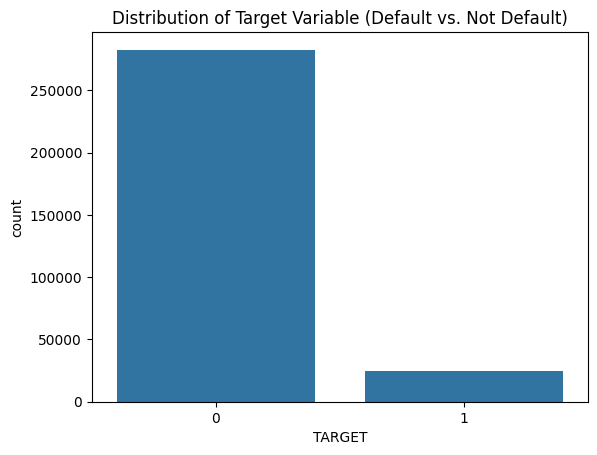

In [ ]:
sns.countplot(x='TARGET', data=df_applicationtrain)
plt.title('Distribution of Target Variable (Default vs. Not Default)')
plt.show()

In [ ]:
# Select numerical features for correlation analysis
numerical_features = df_applicationtrain.select_dtypes(include=np.number)

# Drop the 'SK_ID_CURR' column as it's an identifier, not a feature for correlation.
numerical_features = numerical_features.drop(columns=['SK_ID_CURR'], errors='ignore')

# Handle missing values (replace with 0 for simplicity, consider more sophisticated imputation in a real-world scenario).
numerical_features = numerical_features.fillna(0)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix (you can adjust the display options if needed).
correlation_matrix


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012794,-0.039565,-0.037227,0.078239,-0.044932,0.041975,...,-0.007952,-0.001358,0.000215,0.003709,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.005522
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021414,-0.002008,-0.025573,0.330938,-0.239818,0.183395,...,0.004031,0.000864,0.000988,-0.002450,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.029618
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191639,0.159664,0.074796,0.027261,-0.064223,0.027805,...,0.003130,0.002408,0.000242,-0.000589,0.001432,0.003481,0.003950,0.026746,0.007924,0.019922
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770080,0.986687,0.099738,-0.055436,-0.066838,0.009621,...,0.034329,0.021082,0.031023,-0.016148,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.026404
AMT_ANNUITY,-0.012794,0.021414,0.191639,0.770080,1.000000,0.775063,0.118345,0.009419,-0.104290,0.038516,...,-0.009737,0.004574,0.011719,-0.017596,0.003893,0.002289,0.013416,0.037147,0.010682,-0.005801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001701,0.000107,0.003481,0.005028,0.002289,0.005501,0.001160,0.001018,0.000309,-0.000498,...,0.012956,0.001154,0.000078,-0.001076,0.230873,1.000000,0.218370,-0.002750,-0.001551,0.004981
AMT_REQ_CREDIT_BUREAU_WEEK,-0.001306,-0.001083,0.003950,0.001634,0.013416,0.001966,-0.002335,-0.004014,0.002505,-0.001060,...,-0.003666,-0.001006,-0.001239,-0.000057,0.006422,0.218370,1.000000,-0.007423,-0.007466,0.039229
AMT_REQ_CREDIT_BUREAU_MON,-0.014794,-0.007983,0.026746,0.055536,0.037147,0.057456,0.071630,-0.003580,-0.032416,-0.010617,...,-0.000179,-0.002230,0.002177,-0.003489,0.002973,-0.002750,-0.007423,1.000000,0.005318,0.032681
AMT_REQ_CREDIT_BUREAU_QRT,-0.005833,-0.004913,0.007924,0.020379,0.010682,0.020876,-0.001873,-0.016281,0.013466,-0.001340,...,-0.003362,-0.001079,0.000034,-0.002066,0.000725,-0.001551,-0.007466,0.005318,1.000000,0.113519


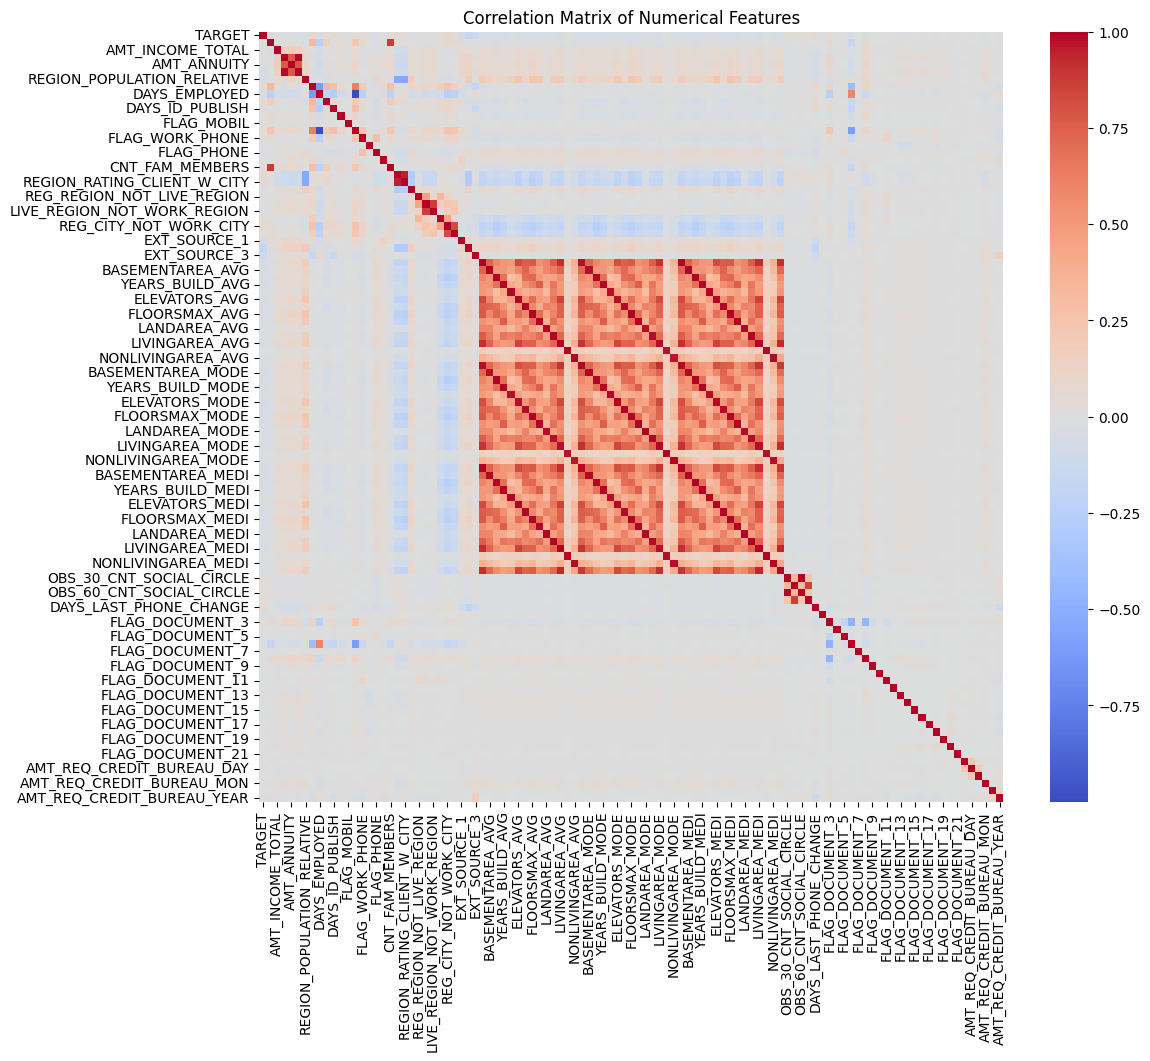

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# prompt: sort descending correlation matrix for column target and show top 30

# Assuming 'correlation_matrix' is already calculated as in your provided code.
# If not, please ensure you run the code to calculate it before running this snippet.

target_correlations = correlation_matrix['TARGET'].drop('TARGET') #Exclude self-correlation

#Sort correlations in descending order
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

# Display the top 30
print(sorted_correlations.head(30))


EXT_SOURCE_2                    0.159030
EXT_SOURCE_3                    0.119572
DAYS_BIRTH                      0.078239
EXT_SOURCE_1                    0.064698
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055217
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLOORSMAX_AVG                   0.049839
FLOORSMAX_MEDI                  0.049720
FLOORSMAX_MODE                  0.049458
FLAG_EMP_PHONE                  0.045982
DAYS_EMPLOYED                   0.044932
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
TOTALAREA_MODE                  0.041037
YEARS_BEGINEXPLUATATION_MEDI    0.040983
YEARS_BEGINEXPLUATATION_AVG     0.040965
YEARS_BEGINEXPLUATATION_MODE    0.040944
LIVINGAREA_AVG                  0.040301
LIVINGAREA_MEDI                 0.040123
APARTMENTS_AVG                  0.039924
APARTMENTS_MEDI 

In [ ]:
# Check missing values in the TARGET column
print(df_applicationtrain['TARGET'].isnull().sum())

# Check missing values in ALL columns
print(df_applicationtrain.isnull().sum())

0
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


In [ ]:
# prompt:  Print 5 rows AMT_INCOME_TOTAL

print(df_applicationtrain['AMT_INCOME_TOTAL'].head(5))


0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
# Example: Select important columns for correlation
selected_cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
correlations = df_applicationtrain[selected_cols].corr()['TARGET'].sort_values()
print(correlations)

DAYS_EMPLOYED      -0.044932
AMT_CREDIT         -0.030369
AMT_INCOME_TOTAL   -0.003982
DAYS_BIRTH          0.078239
TARGET              1.000000
Name: TARGET, dtype: float64


In [ ]:
# See how many people default (0 = no, 1 = yes)
print(df_applicationtrain['TARGET'].value_counts())

# Check correlations (what affects default?)
# Select only numerical features for correlation analysis
numerical_features = df_applicationtrain.select_dtypes(include=np.number)

# Drop the 'SK_ID_CURR' column as it's an identifier, not a feature for correlation.
numerical_features = numerical_features.drop(columns=['SK_ID_CURR'], errors='ignore')

correlations = numerical_features.corr()['TARGET'].sort_values()
print(correlations)

TARGET
0    282686
1     24825
Name: count, dtype: int64
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
                                 ...   
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 105, dtype: float64


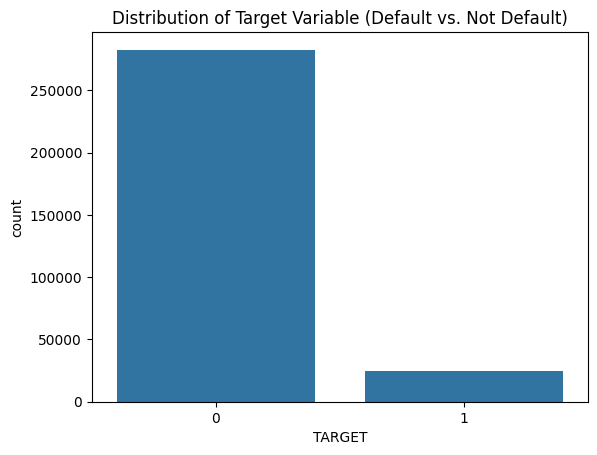

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


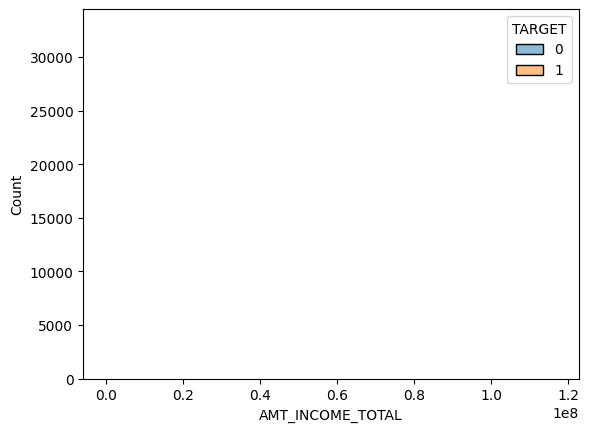

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1: Plot defaults
sns.countplot(x='TARGET', data=df_applicationtrain)
plt.title('Distribution of Target Variable (Default vs. Not Default)')
plt.show()

# Example 2: Income vs. Default
sns.histplot(data=df_applicationtrain, x='AMT_INCOME_TOTAL', hue='TARGET')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Prepare data
X = df_applicationtrain.drop('TARGET', axis=1)  # Features (inputs)
y = df_applicationtrain['TARGET']               # Target (output)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Create encoder instance
encoded_features = encoder.fit_transform(X[categorical_features])  # Fit and transform
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))  # Create DataFrame

# Combine encoded features with numerical features
X = pd.concat([X[numerical_features], encoded_df], axis=1)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model (robot brain)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check accuracy
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9204754239630587


In [7]:
import plotly.express as px

# Feature importance (what causes default?)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 10 features
fig = px.bar(feature_importance.head(10), x='Feature', y='Importance')
fig.show()

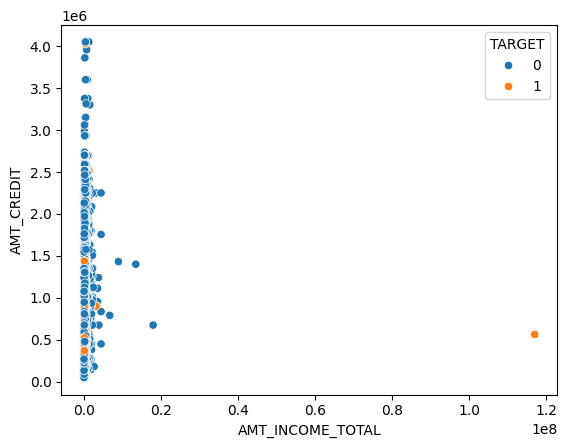

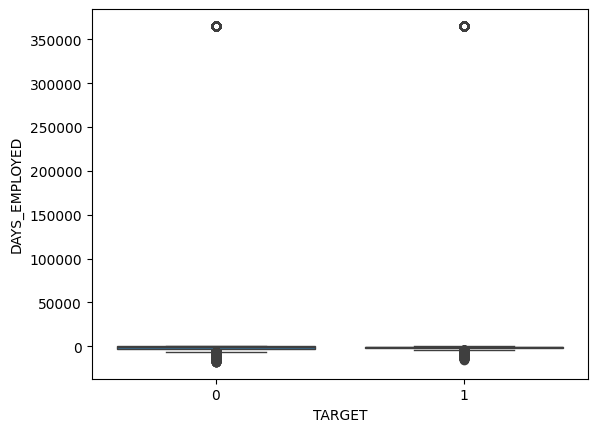

In [ ]:
# explain what causes defaults.
# Example: Income vs. Credit Amount
sns.scatterplot(data=df_applicationtrain, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET')
plt.show()

# Example: Employment Length vs. Default
sns.boxplot(data=df_applicationtrain, x='TARGET', y='DAYS_EMPLOYED')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


In [9]:
X = df_applicationtrain.drop('TARGET', axis=1)  # Features
y = df_applicationtrain['TARGET']               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [11]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

In [12]:
X = pd.concat([X[numerical_features], encoded_df], axis=1)

In [32]:
# Check non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [13]:
# Convert categorical columns to dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [14]:
# Align columns (in case some categories are missing in test data)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Simplified hyperparameter grid
param_grid_fast = {
    'n_estimators': [50, 100],          # Fewer trees (default: 100)
    'max_depth': [10, 20],               # Shallower trees (default: None)
    'min_samples_split': [2, 5],         # Simpler splits
    'class_weight': ['balanced']         # Only use balanced class weights
}

# Use fewer iterations and cross-validation folds
model = RandomForestClassifier(random_state=42)
search_fast = RandomizedSearchCV(
    model,
    param_grid_fast,
    n_iter=10,            # Only test 10 combinations (down from 20)
    cv=2,                 # 2-fold cross-validation (faster than 3)
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1             # Use all cores (but works even if Colab throttles it)
)
search_fast.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='roc_auc', verbose=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Simplified hyperparameter grid
param_grid_fast = {
    'n_estimators': [50, 100],          # Fewer trees (default: 100)
    'max_depth': [10, 20],               # Shallower trees (default: None)
    'min_samples_split': [2, 5],         # Simpler splits
    'class_weight': ['balanced']         # Only use balanced class weights
}

# Use fewer iterations and cross-validation folds
model = RandomForestClassifier(random_state=42)
search_fast = RandomizedSearchCV(
    model,
    param_grid_fast,
    n_iter=10,            # Only test 10 combinations (down from 20)
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1             # Use all cores (but works even if Colab throttles it)
)
search_fast.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='roc_auc', verbose=1)

In [16]:
print("Best hyperparameters:", search_fast.best_params_)
print("Best AUC score:", search_fast.best_score_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best AUC score: 0.7262741310201118


In [39]:
best_params = search_fast.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score, classification_report,confussion_matrix

y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

ImportError: cannot import name 'confussion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Corrected import

y_pred = search_fast.best_estimator_.predict(X_test)  # Use search_fast instead of random_search
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     28233
           1       0.17      0.61      0.26      2519

    accuracy                           0.72     30752
   macro avg       0.56      0.67      0.54     30752
weighted avg       0.89      0.72      0.78     30752

Confusion Matrix:
 [[20549  7684]
 [  975  1544]]


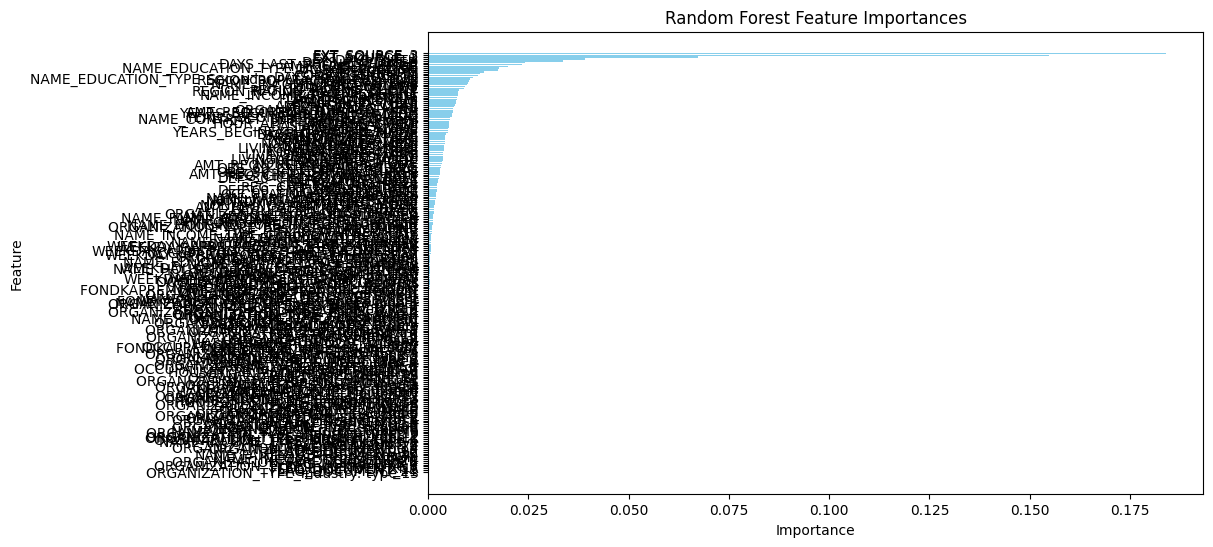

                                  Feature  Importance
30                           EXT_SOURCE_3    0.184117
29                           EXT_SOURCE_2    0.154793
28                           EXT_SOURCE_1    0.067305
7                              DAYS_BIRTH    0.038973
8                           DAYS_EMPLOYED    0.033720
78                 DAYS_LAST_PHONE_CHANGE    0.024040
5                         AMT_GOODS_PRICE    0.023313
123  NAME_EDUCATION_TYPE_Higher education    0.020004
10                        DAYS_ID_PUBLISH    0.017641
3                              AMT_CREDIT    0.017301


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

best_rf_model = search_fast.best_estimator_
feature_importances = best_rf_model.feature_importances_

feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the tgc
plt.show()

print(feature_importance_df.head(10))